# BANCA TRINACRIA - Customer Segmentation
## Analisi Segmentazione Clienti e Clustering

**Autore**: Vincenzo Alesi | Data Analyst  
**Data**: Gennaio 2026  
**Obiettivo**: Segmentazione avanzata clientela con approccio RFM e clustering

---

# Setup delle librerie

In questa sezione vengono importate e organizzate tutte le librerie utilizzate
nel progetto, suddivise per area funzionale per migliorare leggibilità e
manutenibilità del codice.

## Manipolazione dei dati

Utilizziamo:
- **pandas** per la gestione di DataFrame e dataset tabellari
- **numpy** per operazioni numeriche e matriciali efficienti

## Visualizzazione

Librerie utilizzate:
- **matplotlib** per grafici statici altamente personalizzabili
- **seaborn** per visualizzazioni statistiche ad alto livello

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning

Queste librerie sono utilizzate per:
- suddivisione del dataset in training e test set
- preprocessing e codifica delle variabili
- addestramento di modelli di classificazione
- valutazione delle performance dei modelli

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    accuracy_score
)

## Gestione delle classi sbilanciate

In presenza di dataset non bilanciati, viene utilizzata la tecnica SMOTE
(Synthetic Minority Over-sampling Technique) per migliorare le performance
dei modelli.

In [5]:
from imblearn.over_sampling import SMOTE

## Statistica e preprocessing

Queste librerie servono per:
- test statistici (t-test, chi-quadro, correlazioni)
- analisi delle distribuzioni
- supporto all’analisi esplorativa dei dati

In [6]:
from scipy import stats

## Gestione dei warning

I warning vengono disabilitati per mantenere l’output pulito e leggibile,
soprattutto durante le fasi di analisi esplorativa e modellazione.


In [7]:
import warnings
warnings.filterwarnings('ignore')

## Stile dei grafici

Viene impostato uno stile coerente e moderno per tutte le visualizzazioni:
- stile scuro per matplotlib
- palette cromatica uniforme per seaborn

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerie importate correttamente")

✓ Librerie importate correttamente


## 1. Caricamento e Preparazione dei Dati

In questa fase vengono caricati i dataset principali del progetto a partire
dalla directory dedicata ai file CSV.

I dati riguardano:
- clienti
- conti
- transazioni
- prestiti

Successivamente vengono create alcune **variabili derivate** utili
per l’analisi, come l’età del cliente e l’anzianità del rapporto con la banca.

In [9]:
# Percorso dei dati
DATA_PATH = r"C:\Users\Vincenzo\Desktop\Banca\Python\data\csv_output\\"

# Caricamento dei dataset
df_clienti = pd.read_csv(
    f'{DATA_PATH}clienti.csv',
    parse_dates=['data_nascita', 'data_acquisizione']
)

df_conti = pd.read_csv(f'{DATA_PATH}conti.csv')

df_transazioni = pd.read_csv(
    f'{DATA_PATH}transazioni.csv',
    parse_dates=['data_transazione']
)

df_prestiti = pd.read_csv(f'{DATA_PATH}prestiti.csv')

### Creazione di variabili derivate

Vengono calcolate due nuove variabili a partire dalle date:
- **età** del cliente
- **anzianità** del cliente (anni di relazione con l’istituto)

Le variabili temporali vengono trasformate in anni per facilitare
le analisi statistiche e i modelli di Machine Learning.

In [10]:
# Calcolo età del cliente
df_clienti['eta'] = (
    pd.Timestamp.now() - df_clienti['data_nascita']
).dt.days // 365

# Calcolo anni di relazione con la banca
df_clienti['anni_cliente'] = (
    pd.Timestamp.now() - df_clienti['data_acquisizione']
).dt.days // 365

### Verifica dei dataset

Viene effettuato un controllo rapido:
- numero di record nei dataset principali
- anteprima delle prime righe del dataset clienti

In [11]:
print(f"Clienti: {len(df_clienti):,}")
print(f"Transazioni: {len(df_transazioni):,}")

df_clienti.head()

Clienti: 50,000
Transazioni: 91,541


,cliente_id,codice_fiscale,nome,cognome,data_nascita,genere,email,telefono,indirizzo,comune,...,professione,credit_score,stato_cliente,filiale_id,gestore_id,data_acquisizione,created_at,updated_at,eta,anni_cliente
0,1,BCFYMC20A79M657Y,Valentina,SuteraRusso,2002-02-01,M,valentina.suterarusso@alice.it,393203843098,Via Vittorio Emanuele 158,Siracusa,...,Geometra,631,Attivo,25,91,2022-05-06,2026-01-26 22:21:42.853954,2026-01-26 22:21:42.853957,24,3
1,2,LSLGBS95T89L382J,Giuseppe,Costa,1970-02-09,F,giuseppe_costa180@hotmail.it,393458181845,Via Roma 132,Palermo,...,Pensionato,639,Attivo,8,249,2017-10-21,2026-01-26 22:21:42.856664,2026-01-26 22:21:42.856666,56,8
2,3,KVSXXN23D62K435L,Andrea,Fiore,1983-02-06,M,andrea_fiore@gmail.com,393391827553,Via Garibaldi 47,Gela,...,Ingegnere,746,Attivo,32,91,2023-04-01,2026-01-26 22:21:42.858478,2026-01-26 22:21:42.858480,43,2
3,4,WWKVDC94A75B833X,Carmela,Salerno,1976-02-08,F,carmela_salerno@libero.it,393484639208,Via Cavour 123,Palermo,...,Ingegnere,725,Attivo,2,165,2024-08-25,2026-01-26 22:21:42.860829,2026-01-26 22:21:42.860831,50,1
4,5,MSBGQJ62P22T314R,Teresa,Platania,2008-01-31,F,teresa_platania185@outlook.com,393319314386,Via Cavour 51,Catania,...,Dirigente,616,Attivo,16,45,2020-04-21,2026-01-26 22:21:42.863170,2026-01-26 22:21:42.863172,18,5


## 2. RFM Analysis

L’analisi RFM (Recency, Frequency, Monetary) è una tecnica utilizzata per
segmentare i clienti in base al loro comportamento transazionale.

Le metriche considerate sono:
- **Recency**: da quanto tempo è avvenuta l’ultima transazione
- **Frequency**: numero totale di transazioni
- **Monetary**: valore economico complessivo delle transazioni

### 2.1 Calcolo delle metriche RFM

Le metriche RFM vengono inizialmente calcolate a livello di **conto**,
per poi essere aggregate a livello di **cliente**, così da ottenere
una vista unica per ciascun cliente.

In [12]:
# Aggregazione delle metriche RFM a livello di conto
rfm = df_transazioni.groupby('conto_id').agg({
    'data_transazione': lambda x: (pd.Timestamp.now() - x.max()).days,
    'transazione_id': 'count',
    'importo': 'sum'
}).rename(columns={
    'data_transazione': 'recency',
    'transazione_id': 'frequency',
    'importo': 'monetary'
})

### Integrazione con l’anagrafica clienti

I dati RFM calcolati a livello di conto vengono collegati ai clienti
tramite il mapping **conto → cliente**.

Successivamente, le metriche vengono aggregate per ottenere
un’unica riga per cliente:
- **recency**: minimo tra i conti (ultima interazione più recente)
- **frequency**: somma delle transazioni
- **monetary**: valore totale delle transazioni

In [13]:
# Merge con il dataset dei conti
rfm = rfm.merge(
    df_conti[['conto_id', 'cliente_id']],
    on='conto_id',
    how='left'
)

# Aggregazione finale a livello di cliente
rfm = rfm.groupby('cliente_id').agg({
    'recency': 'min',
    'frequency': 'sum',
    'monetary': 'sum'
})

### Analisi descrittiva

Viene visualizzato un riepilogo statistico delle metriche RFM
per valutare:
- distribuzione dei valori
- presenza di outlier
- range e variabilità delle metriche

In [14]:
print("Statistiche RFM:")
rfm.describe()

Statistiche RFM:


,recency,frequency,monetary
count,30420.000000,30420.000000,30420.000000
mean,1624.271368,3.009237,2911.815537
std,997.643867,3.129383,6158.325495
min,394.000000,1.000000,0.460000
25%,773.000000,1.000000,123.350000
50%,1357.000000,2.000000,704.870000
75%,2303.000000,4.000000,3583.572500
max,4046.000000,93.000000,286376.180000


### 2.2 RFM Scoring

In questa fase le metriche RFM vengono trasformate in **punteggi discreti**
(da 1 a 5) utilizzando i **quantili** della distribuzione.

Questo consente di:
- rendere confrontabili le metriche
- facilitare la segmentazione dei clienti

### Calcolo dei punteggi RFM

- **Recency**: valori più bassi indicano clienti più recenti → punteggio invertito
- **Frequency**: più transazioni → punteggio più alto
- **Monetary**: maggiore spesa → punteggio più alto

In [18]:
# Creazione dei punteggi RFM (1–5)

rfm['r_score'] = pd.qcut(
    rfm['recency'],
    5,
    labels=[5, 4, 3, 2, 1]  # invertito: più recente = score più alto
)

rfm['f_score'] = pd.qcut(
    rfm['frequency'].rank(method='first'),
    5,
    labels=[1, 2, 3, 4, 5]
)

rfm['m_score'] = pd.qcut(
    rfm['monetary'],
    5,
    labels=[1, 2, 3, 4, 5]
)

### Segmentazione dei clienti

I clienti vengono assegnati a un segmento RFM
in base alla combinazione dei punteggi R, F e M.

In [19]:
def assign_rfm_segment(row):
    r, f, m = int(row['r_score']), int(row['f_score']), int(row['m_score'])
    
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f <= 2:
        return 'Potential Loyalists'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Active'
    elif r <= 2 and f >= 4:
        return 'At Risk'
    elif r <= 2 and f <= 2:
        return 'Lost'
    else:
        return 'Others'

In [20]:
rfm['segment'] = rfm.apply(assign_rfm_segment, axis=1)

### Controllo dei punteggi e dei segmenti

In [21]:
rfm[['recency', 'frequency', 'monetary',
     'r_score', 'f_score', 'm_score',
     'segment']].head()

,recency,frequency,monetary,r_score,f_score,m_score,segment
cliente_id,,,,,,,
1,398,1,4767.92,5,1,5,Potential Loyalists
3,1210,3,5690.47,3,4,5,Active
5,3011,1,3072.65,1,1,4,Lost
7,1371,4,700.95,3,4,3,Active
8,1002,2,107.57,4,2,2,Potential Loyalists


### 2.4 Analisi del Valore per Segmento

In questa fase viene analizzato il valore medio dei clienti
per ciascun segmento RFM, al fine di:
- confrontare il valore economico dei segmenti
- individuare i gruppi più strategici
- supportare decisioni di marketing e retention

### Calcolo del punteggio RFM complessivo

Il punteggio **RFM Total** è ottenuto come somma dei punteggi:
- Recency
- Frequency
- Monetary

Questa metrica sintetizza il valore complessivo del cliente.

In [22]:
rfm['rfm_total'] = (
    rfm['r_score'].astype(int) +
    rfm['f_score'].astype(int) +
    rfm['m_score'].astype(int)
)

### Metriche medie per segmento

Per ogni segmento RFM vengono calcolate:
- Recency media
- Frequency media
- Monetary medio
- RFM Total medio

Vengono inoltre aggiunte:
- numerosità del segmento
- percentuale sul totale clienti

In [23]:
segment_analysis = rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'rfm_total': 'mean'
}).round(2)

segment_analysis['count'] = rfm.groupby('segment').size()
segment_analysis['pct'] = (segment_analysis['count'] / len(rfm) * 100).round(2)

### Lettura dei risultati

I segmenti vengono ordinati in base al valore monetario medio
per evidenziare i gruppi a maggiore valore economico.

In [24]:
print("\nAnalisi per Segmento:")
segment_analysis.sort_values('monetary', ascending=False)


Analisi per Segmento:


,recency,frequency,monetary,rfm_total,count,pct
segment,,,,,,
Champions,677.84,7.08,9300.42,13.94,5510,18.11
Active,1358.51,3.98,4182.69,11.07,3145,10.34
At Risk,2206.49,3.69,3218.56,9.72,1889,6.21
Loyal Customers,722.43,3.11,1089.88,10.93,4287,14.09
Others,1875.09,1.71,1042.51,7.27,5432,17.86
Lost,2852.78,1.02,766.88,4.94,7780,25.58
Potential Loyalists,739.46,1.06,755.62,8.02,2377,7.81


### Visualizzazione del valore medio per segmento

Il grafico a barre orizzontali mostra il valore monetario medio
associato a ciascun segmento RFM.

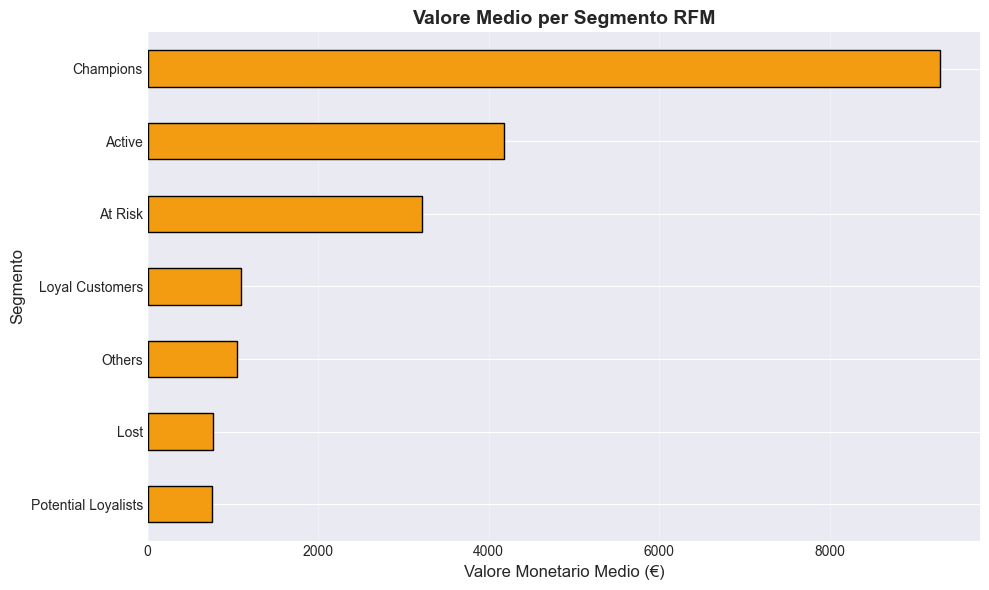

In [27]:
# Ordinamento decrescente per valore monetario
segment_sorted = segment_analysis.sort_values(
    by='monetary',
    ascending=False
)

fig, ax = plt.subplots(figsize=(10, 6))

segment_sorted['monetary'].plot(
    kind='barh',
    ax=ax,
    color='#f39c12',   
    edgecolor='black'
)

# Invertiamo l'asse Y per avere il valore più alto in alto
ax.invert_yaxis()

ax.set_xlabel('Valore Monetario Medio (€)', fontsize=12)
ax.set_ylabel('Segmento', fontsize=12)
ax.set_title('Valore Medio per Segmento RFM', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. K-Means Clustering

Dopo l’analisi RFM, viene applicato un approccio di **clustering non supervisionato**
per individuare gruppi omogenei di clienti sulla base di caratteristiche
demografiche, comportamentali e finanziarie.

### 3.1 Feature Engineering

In questa fase vengono costruite le variabili utilizzate per il clustering,
integrando informazioni provenienti da:
- anagrafica clienti
- comportamento transazionale (RFM)
- dati sui prestiti

L’obiettivo è ottenere una vista completa del cliente.

In [28]:
# Merge tra anagrafica clienti e metriche RFM
df_clustering = df_clienti.merge(
    rfm,
    left_on='cliente_id',
    right_index=True,
    how='inner'
)

### Aggregazione dei prestiti per cliente

I dati sui prestiti vengono aggregati a livello di cliente
per ottenere:
- importo totale erogato
- numero di prestiti attivi o storici

In [29]:
prestiti_agg = df_prestiti.groupby('cliente_id').agg({
    'importo_erogato': 'sum',
    'prestito_id': 'count'
}).rename(columns={'prestito_id': 'num_prestiti'})

### Integrazione dei dati e gestione dei valori mancanti

I dati aggregati sui prestiti vengono integrati nel dataset di clustering.
I valori mancanti vengono sostituiti con zero, indicando l’assenza di prestiti.

In [30]:
df_clustering = df_clustering.merge(
    prestiti_agg,
    left_on='cliente_id',
    right_index=True,
    how='left'
)

df_clustering['importo_erogato'] = df_clustering['importo_erogato'].fillna(0)
df_clustering['num_prestiti'] = df_clustering['num_prestiti'].fillna(0)

### Selezione delle feature numeriche

Vengono selezionate esclusivamente variabili numeriche
per l’algoritmo di clustering:

- variabili demografiche
- metriche comportamentali (RFM)
- indicatori finanziari legati ai prestiti

In [31]:
features_clustering = [
    'eta',
    'reddito_annuo',
    'credit_score',
    'recency',
    'frequency',
    'monetary',
    'importo_erogato',
    'num_prestiti'
]

X_cluster = df_clustering[features_clustering]

### Controllo del dataset

Viene verificata:
- la dimensionalità del dataset
- la distribuzione statistica delle variabili selezionate

In [32]:
print(f"Shape dataset clustering: {X_cluster.shape}")

print("\nStatistiche:")
X_cluster.describe()

Shape dataset clustering: (30420, 8)

Statistiche:


,eta,reddito_annuo,credit_score,recency,frequency,monetary,importo_erogato,num_prestiti
count,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000
mean,44.800723,36916.438137,629.051907,1624.271368,3.009237,2911.815537,22746.092698,0.303517
std,14.505836,19162.556888,61.834375,997.643867,3.129383,6158.325495,61086.054159,0.557388
min,18.000000,8000.000000,450.000000,394.000000,1.000000,0.460000,0.000000,0.000000
25%,34.000000,23618.442500,586.000000,773.000000,1.000000,123.350000,0.000000,0.000000
50%,45.000000,32812.845000,628.000000,1357.000000,2.000000,704.870000,0.000000,0.000000
75%,55.000000,45414.082500,670.000000,2303.000000,4.000000,3583.572500,7635.677500,1.000000
max,90.000000,196189.340000,850.000000,4046.000000,93.000000,286376.180000,685972.190000,5.000000


### 3.2 Determinazione del Numero di Cluster Ottimale

Prima di applicare l’algoritmo K-Means è necessario determinare
il numero ottimale di cluster **k**.

A tal fine viene utilizzato l’**Elbow Method**, che analizza
l’andamento dell’inerzia al variare del numero di cluster.

### Standardizzazione delle variabili

Le feature selezionate presentano scale molto diverse
(es. reddito, frequenza, importi monetari).

Per evitare che alcune variabili dominino il clustering,
i dati vengono standardizzati utilizzando lo **StandardScaler**.

In [33]:
# Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

### Elbow Method

Per ciascun valore di **k** viene calcolata l’**inerzia**,
ossia la somma delle distanze quadratiche dei punti
dal centroide del cluster di appartenenza.

L’obiettivo è individuare il punto in cui la riduzione
dell’inerzia diventa marginale (il cosiddetto “gomito”).

In [34]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

### Visualizzazione del metodo del gomito

Il grafico mostra l’andamento dell’inerzia al crescere del numero
di cluster, consentendo di individuare visivamente il valore di **k**
più appropriato.

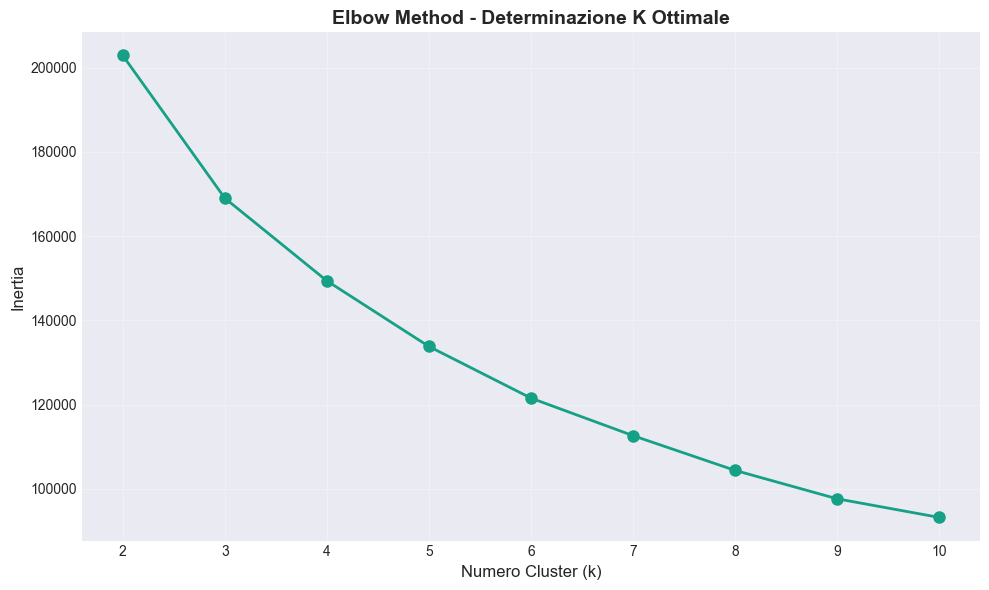

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(
    K_range,
    inertias,
    marker='o',
    linewidth=2,
    markersize=8,
    color='#16a085'
)

plt.xlabel('Numero Cluster (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method - Determinazione K Ottimale', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretazione del grafico

Il valore ottimale di **k** corrisponde al punto in cui
la curva dell’inerzia cambia pendenza in modo evidente.

In genere, valori come **k = 4** o **k = 5**
rappresentano un buon compromesso tra:
- semplicità del modello
- capacità di rappresentare la struttura dei dati

In [36]:
print("Suggerimento: cercare il 'gomito' nella curva (es. k = 4 o k = 5)")

Suggerimento: cercare il 'gomito' nella curva (es. k = 4 o k = 5)


### 3.3 K-Means con k = 4

In questa fase viene applicato l’algoritmo **K-Means** con il numero
di cluster selezionato tramite Elbow Method (k = 4).

A ciascun cliente viene assegnato un cluster, che rappresenta
un gruppo omogeneo di comportamento e caratteristiche.

In [37]:
# Definizione numero cluster ottimale
k_optimal = 4

# K-Means finale
kmeans = KMeans(
    n_clusters=k_optimal,
    random_state=42,
    n_init=10
)

# Assegnazione cluster ai clienti
df_clustering['cluster'] = kmeans.fit_predict(X_scaled)

### Distribuzione dei cluster

Viene analizzata la numerosità dei clienti in ciascun cluster,
per verificare eventuali sbilanciamenti.

In [38]:
print(f"\nDistribuzione cluster (k = {k_optimal}):")
print(df_clustering['cluster'].value_counts().sort_index())


Distribuzione cluster (k = 4):
cluster
0    15046
1     3386
2    10825
3     1163
Name: count, dtype: int64


### Profilazione dei cluster

Per ciascun cluster vengono calcolate le medie delle variabili
utilizzate nel clustering.

Inoltre, viene associato il **segmento RFM prevalente**
per facilitare l’interpretazione business dei cluster.

In [39]:
cluster_profiles = df_clustering.groupby('cluster').agg({
    'eta': 'mean',
    'reddito_annuo': 'mean',
    'credit_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'importo_erogato': 'mean',
    'num_prestiti': 'mean',
    'segment': lambda x: x.mode()[0] if len(x) > 0 else 'N/A'
}).round(2)

### Profilo medio dei cluster

La tabella seguente riassume le caratteristiche principali
dei clienti appartenenti a ciascun cluster.

In [40]:
print("\nProfilo Cluster:")
cluster_profiles


Profilo Cluster:


,eta,reddito_annuo,credit_score,recency,frequency,monetary,importo_erogato,num_prestiti,segment
cluster,,,,,,,,,
0,43.94,26575.36,591.96,1974.21,1.89,1125.81,3203.23,0.14,Lost
1,45.21,36169.95,638.27,1645.81,2.70,2288.67,169151.53,1.39,Lost
2,45.93,47464.42,671.02,1231.33,3.56,3369.44,4720.25,0.19,Champions
3,44.24,74695.89,691.42,691.72,13.16,23572.57,17108.02,0.30,Champions


### 3.4 Visualizzazione PCA

Per facilitare l’interpretazione dei cluster, viene applicata
la **Principal Component Analysis (PCA)** per ridurre la dimensionalità
dei dati a **due componenti principali**, mantenendo la maggior parte
dell’informazione originale.

La PCA consente di:
- visualizzare i cluster in uno spazio bidimensionale
- valutare la separazione tra i gruppi
- comprendere quanta varianza viene spiegata dalle componenti principali

### Riduzione dimensionale con PCA

La PCA viene applicata ai dati **standardizzati** utilizzati
nel clustering K-Means, garantendo coerenza tra le analisi.

In [41]:
# PCA per visualizzazione bidimensionale
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_clustering['cluster'].values

### Visualizzazione dei cluster nello spazio PCA

Ogni punto rappresenta un cliente, colorato in base al cluster
di appartenenza.

Le percentuali sugli assi indicano la quota di varianza
spiegata da ciascuna componente principale.

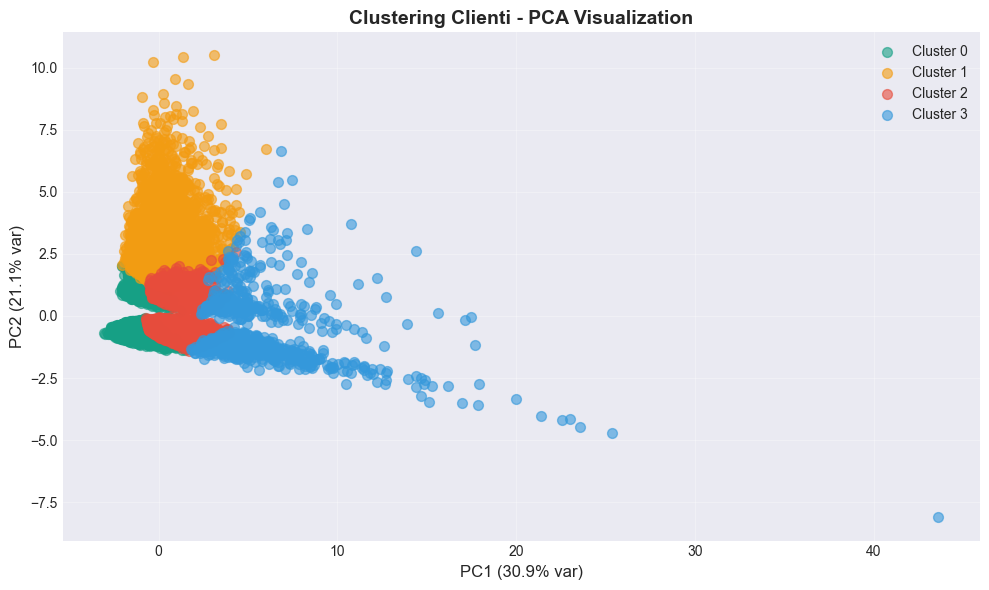

In [42]:
plt.figure(figsize=(10, 6))

colors = ['#16a085', '#f39c12', '#e74c3c', '#3498db']

for i in range(k_optimal):
    cluster_data = df_pca[df_pca['cluster'] == i]
    plt.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        label=f'Cluster {i}',
        alpha=0.6,
        s=50,
        color=colors[i]
    )

plt.xlabel(
    f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)',
    fontsize=12
)
plt.ylabel(
    f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)',
    fontsize=12
)

plt.title(
    'Clustering Clienti - PCA Visualization',
    fontsize=14,
    fontweight='bold'
)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Varianza spiegata

La varianza totale spiegata dalle due componenti principali
indica quanta informazione del dataset originale viene mantenuta
nella rappresentazione bidimensionale.

In [43]:
print(f"\nVarianza spiegata PCA: {pca.explained_variance_ratio_.sum()*100:.2f}%")


Varianza spiegata PCA: 52.01%


### 3.5 Naming dei Cluster

In questa fase viene assegnata un’etichetta descrittiva a ciascun cluster,
con l’obiettivo di:
- rendere i cluster facilmente interpretabili
- collegare i risultati del clustering a concetti di business
- supportare decisioni operative e strategiche

### Analisi sintetica per il naming

Per ciascun cluster vengono analizzate alcune metriche chiave:
- reddito annuo medio
- credit score medio
- valore monetario e frequenza delle transazioni
- numerosità del cluster

Queste informazioni guidano l’assegnazione del nome.

In [44]:
cluster_summary = df_clustering.groupby('cluster').agg({
    'reddito_annuo': 'mean',
    'credit_score': 'mean',
    'monetary': 'mean',
    'frequency': 'mean',
    'cliente_id': 'count'
}).rename(columns={'cliente_id': 'count'}).round(0)

print("\nSummary per Cluster:")
cluster_summary


Summary per Cluster:


,reddito_annuo,credit_score,monetary,frequency,count
cluster,,,,,
0,26575.0,592.0,1126.0,2.0,15046
1,36170.0,638.0,2289.0,3.0,3386
2,47464.0,671.0,3369.0,4.0,10825
3,74696.0,691.0,23573.0,13.0,1163


### Regole di naming

I nomi dei cluster vengono assegnati sulla base di soglie empiriche,
tenendo conto di:
- capacità di spesa
- affidabilità creditizia
- livello di attività

In [45]:
cluster_names = {}

for i in range(k_optimal):
    profile = cluster_profiles.loc[i]
    
    if profile['reddito_annuo'] > 60000 and profile['credit_score'] > 700:
        cluster_names[i] = 'High Value'
    elif profile['monetary'] < 5000 and profile['frequency'] < 20:
        cluster_names[i] = 'Low Activity'
    elif profile['credit_score'] < 600:
        cluster_names[i] = 'High Risk'
    else:
        cluster_names[i] = 'Core'

### Applicazione dei nomi ai clienti

I nomi dei cluster vengono assegnati a ciascun cliente
nel dataset di clustering.

In [46]:
df_clustering['cluster_name'] = df_clustering['cluster'].map(cluster_names)

### Verifica dei nomi assegnati

Viene mostrata:
- la corrispondenza cluster → nome
- la distribuzione dei clienti per cluster nominato

In [50]:
print("\nCluster Names:")
for k, v in cluster_names.items():
    print(f"Cluster {k}: {v}")

print("\nDistribuzione:")
print(df_clustering['cluster_name'].value_counts())


Cluster Names:
Cluster 0: Low Activity
Cluster 1: Low Activity
Cluster 2: Low Activity
Cluster 3: Core

Distribuzione:
cluster_name
Low Activity    29257
Core             1163
Name: count, dtype: int64


## 4. Insights e Strategie

In questa sezione vengono tradotti i risultati dell’analisi RFM
in **raccomandazioni operative**, utili per guidare decisioni
di marketing, retention e sviluppo commerciale.

### 4.1 Raccomandazioni per Segmento RFM

Per ciascun segmento RFM vengono proposte strategie mirate,
basate sul valore del cliente e sul livello di coinvolgimento.

L’obiettivo è:
- massimizzare il valore dei clienti ad alto potenziale
- ridurre il churn
- allocare in modo efficiente le risorse di marketing

In [55]:
segment_counts = rfm['segment'].value_counts()

print("STRATEGIE PER SEGMENTO RFM")

strategies = {
    'Champions': ' MANTIENI: Reward program, accesso prioritario, prodotti premium',
    'Loyal Customers': ' COLTIVA: Cross-selling, referral program, offerte personalizzate',
    'Potential Loyalists': ' SVILUPPA: Up-selling, engagement campaigns, educazione finanziaria',
    'Active': ' SOSTIENI: Newsletter, promozioni mirate, customer service',
    'At Risk': ' RECUPERA: Win-back campaigns, sondaggi, offerte speciali',
    'Lost': ' RIATTIVA: Re-engagement campaign, incentivi forti, survey churn'
}

for segment, strategy in strategies.items():
    count = segment_counts.get(segment, 0)
    pct = (count / len(rfm) * 100) if len(rfm) > 0 else 0

    print(f"\n{segment} ({count:,} clienti, {pct:.1f}%):")
    print(f"  {strategy}")

STRATEGIE PER SEGMENTO RFM

Champions (5,510 clienti, 18.1%):
   MANTIENI: Reward program, accesso prioritario, prodotti premium

Loyal Customers (4,287 clienti, 14.1%):
   COLTIVA: Cross-selling, referral program, offerte personalizzate

Potential Loyalists (2,377 clienti, 7.8%):
   SVILUPPA: Up-selling, engagement campaigns, educazione finanziaria

Active (3,145 clienti, 10.3%):
   SOSTIENI: Newsletter, promozioni mirate, customer service

At Risk (1,889 clienti, 6.2%):
   RECUPERA: Win-back campaigns, sondaggi, offerte speciali

Lost (7,780 clienti, 25.6%):
   RIATTIVA: Re-engagement campaign, incentivi forti, survey churn


### Interpretazione manageriale

Le strategie suggerite permettono di:
- **proteggere il fatturato** (Champions, Loyal Customers)
- **far crescere il valore nel tempo** (Potential Loyalists, Active)
- **ridurre l’abbandono** (At Risk)
- **valutare azioni di recupero mirate** (Lost)

Questo approccio consente una gestione del portafoglio clienti
basata su dati oggettivi e comportamentali.

### 4.2 Key Insights Clustering

In questa sezione vengono sintetizzati gli insight principali
emersi dall’analisi di clustering.

Per ciascun cluster vengono riportate:
- dimensione del gruppo
- caratteristiche demografiche e finanziarie
- comportamento transazionale
- segmento RFM prevalente

L’obiettivo è fornire una lettura chiara e immediatamente
utilizzabile a livello manageriale.


In [56]:
print("KEY INSIGHTS CLUSTERING")

for i in range(k_optimal):
    profile = cluster_profiles.loc[i]
    cluster_df = df_clustering[df_clustering['cluster'] == i]
    name = cluster_names[i]
    
    print(f"\n{name.upper()} (Cluster {i}):")
    print(f"  • Dimensione: {len(cluster_df):,} clienti "
          f"({len(cluster_df) / len(df_clustering) * 100:.1f}%)")
    print(f"  • Età media: {profile['eta']:.0f} anni")
    print(f"  • Reddito medio: €{profile['reddito_annuo']:,.0f}")
    print(f"  • Credit score: {profile['credit_score']:.0f}")
    print(f"  • Valore monetario medio: €{profile['monetary']:,.0f}")
    print(f"  • Frequenza media transazioni: {profile['frequency']:.0f}")
    print(f"  • Segmento RFM prevalente: {profile['segment']}")


KEY INSIGHTS CLUSTERING

LOW ACTIVITY (Cluster 0):
  • Dimensione: 15,046 clienti (49.5%)
  • Età media: 44 anni
  • Reddito medio: €26,575
  • Credit score: 592
  • Valore monetario medio: €1,126
  • Frequenza media transazioni: 2
  • Segmento RFM prevalente: Lost

LOW ACTIVITY (Cluster 1):
  • Dimensione: 3,386 clienti (11.1%)
  • Età media: 45 anni
  • Reddito medio: €36,170
  • Credit score: 638
  • Valore monetario medio: €2,289
  • Frequenza media transazioni: 3
  • Segmento RFM prevalente: Lost

LOW ACTIVITY (Cluster 2):
  • Dimensione: 10,825 clienti (35.6%)
  • Età media: 46 anni
  • Reddito medio: €47,464
  • Credit score: 671
  • Valore monetario medio: €3,369
  • Frequenza media transazioni: 4
  • Segmento RFM prevalente: Champions

CORE (Cluster 3):
  • Dimensione: 1,163 clienti (3.8%)
  • Età media: 44 anni
  • Reddito medio: €74,696
  • Credit score: 691
  • Valore monetario medio: €23,573
  • Frequenza media transazioni: 13
  • Segmento RFM prevalente: Champions


## 5. Export dei Risultati

In questa sezione vengono esportati i principali output del progetto
in formato CSV, per consentire:
- analisi successive
- integrazione con strumenti esterni (Excel, BI, CRM)
- condivisione con stakeholder e management


### Creazione della directory di output

I file vengono salvati nella cartella `data/insights/`.
La directory viene creata automaticamente se non esiste.

In [57]:
import os

os.makedirs('../data/insights/', exist_ok=True)

### Export segmentazione clienti

Viene esportato un dataset contenente:
- informazioni anagrafiche
- metriche RFM
- cluster assegnato
- nome descrittivo del cluster
- segmento RFM

In [58]:
segmentation_export = df_clustering[[
    'cliente_id',
    'nome',
    'cognome',
    'recency',
    'frequency',
    'monetary',
    'cluster',
    'cluster_name'
]].merge(
    rfm[['segment']],
    left_on='cliente_id',
    right_index=True,
    how='left'
)

segmentation_export.to_csv(
    '../data/insights/customer_segmentation.csv',
    index=False
)

### Export profili dei cluster

Vengono esportate le caratteristiche medie di ciascun cluster,
utili per interpretazione e reporting.

In [59]:
cluster_profiles.to_csv('../data/insights/cluster_profiles.csv')

### Export analisi RFM per segmento

Viene esportata l’analisi aggregata dei segmenti RFM,
comprensiva di valore medio e numerosità.

In [60]:
segment_analysis.to_csv('../data/insights/rfm_segment_analysis.csv')

### Conferma esportazione

Messaggio di conferma per verificare il corretto salvataggio dei file.

In [61]:
print("✓ File esportati in: ../data/insights/")
print("  - customer_segmentation.csv")
print("  - cluster_profiles.csv")
print("  - rfm_segment_analysis.csv")

✓ File esportati in: ../data/insights/
  - customer_segmentation.csv
  - cluster_profiles.csv
  - rfm_segment_analysis.csv
